In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio
import astropy.coordinates
import astropy.time
import time
import astropy.io.fits as fits

In [2]:
data_noise_on = []
data_noise_off = []

In [3]:
data_noise_off_example = fits.open('../Data/celestial_pole-noiseoff_' + str(0) + '.fits')

# Noise Off Dictionary

In [4]:
import glob
files_off = glob.glob('../Data/celestial_pole-noiseoff_*.fits')
#files
data_noise_off = {}
for filename in files_off:
    d_off = fits.open(filename)
    header = dict(d_off[0].header)
    d_off_avg = np.mean([d_off[j].data['auto0_real'] for j in range(1,21)], axis=0)
    data_noise_off[(int(header['L']), int(header['B']))] = d_off_avg

In [5]:
#data_noise_off
Ls = list(set([key[0] for key in data_noise_off.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

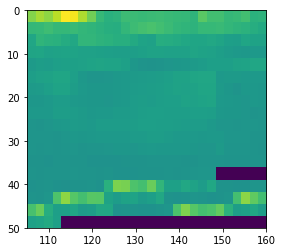

In [6]:
plt.figure()
for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,0])

#keep things in dictionaries, for calibrated data, column densities, velocities 

# Noise On Dictionary

In [7]:
data_noise_on = {}
files_on = glob.glob('../Data/celestial_pole-noiseon_*.fits')

for filename in files_on:
    d_on = fits.open(filename)
    header = dict(d_on[0].header)
    d_on_avg = np.mean([d_on[j].data['auto0_real'] for j in range(1,3)], axis=0)
    data_noise_on[(int(header['L']), int(header['B']))] = d_on_avg
    
#data_noise_on
Ls = list(set([key[0] for key in data_noise_on.keys()]))
Bs = list(set([key[1] for key in data_noise_off.keys()]))
Ls.sort()
Bs.sort()
grid = np.zeros((len(Ls),len(Bs)))
Ls = np.array(Ls)
Bs = np.array(Bs)

<IPython.core.display.Javascript object>


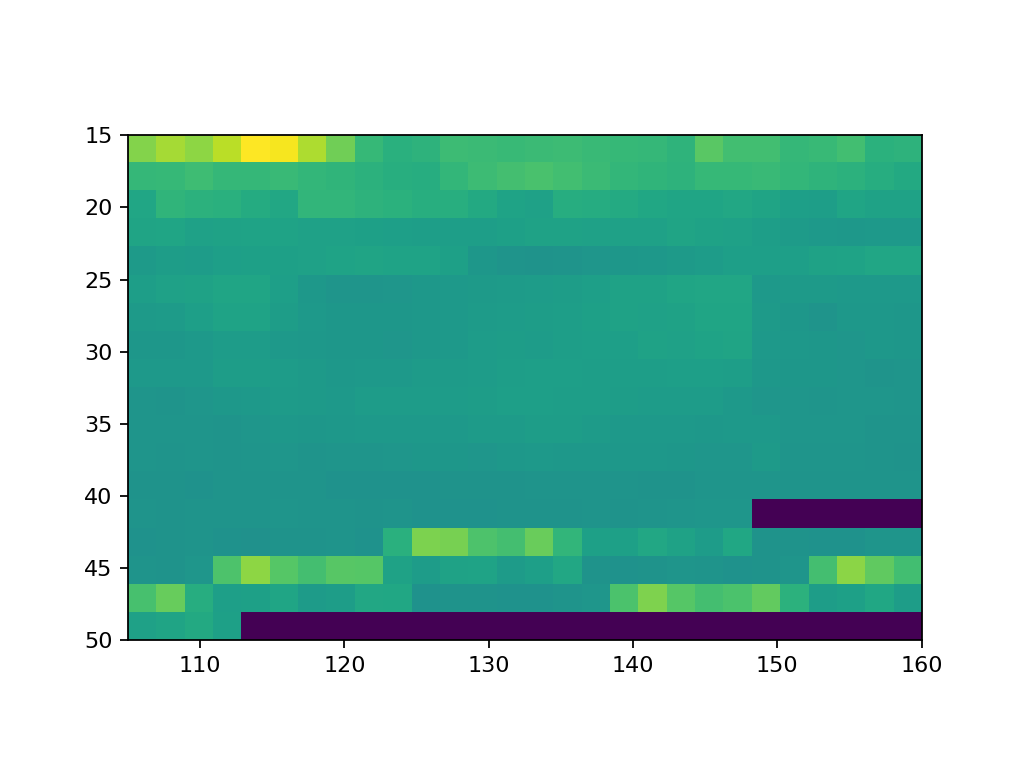

In [35]:
plt.figure()

for (L,B), spec in data_noise_off.items(): #items gives you the keys and the values
    grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
plt.imshow(grid, extent=[105,160,50,15])

#keep things in dictionaries, for calibrated data, column densities, velocities 

In [10]:
hdr = dict(data_noise_off_example[0].header)
if_freq = 144 + np.arange(0, hdr['NCHAN']) * hdr['RES'] / 1e6
rf_freq = if_freq + 2*635

<IPython.core.display.Javascript object>


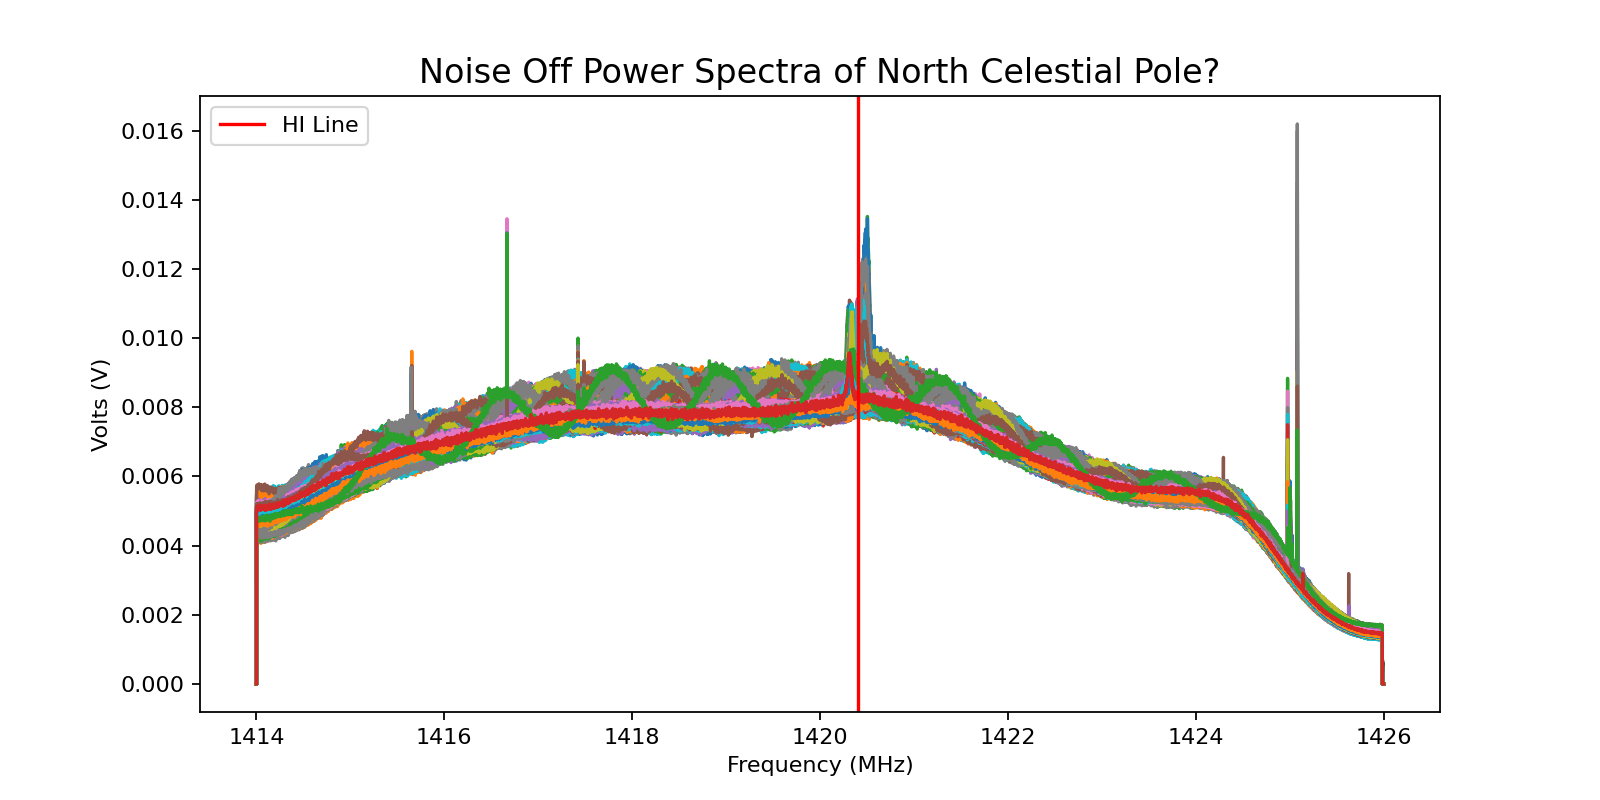

In [11]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in data_noise_off:
    
    plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise Off Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

<IPython.core.display.Javascript object>


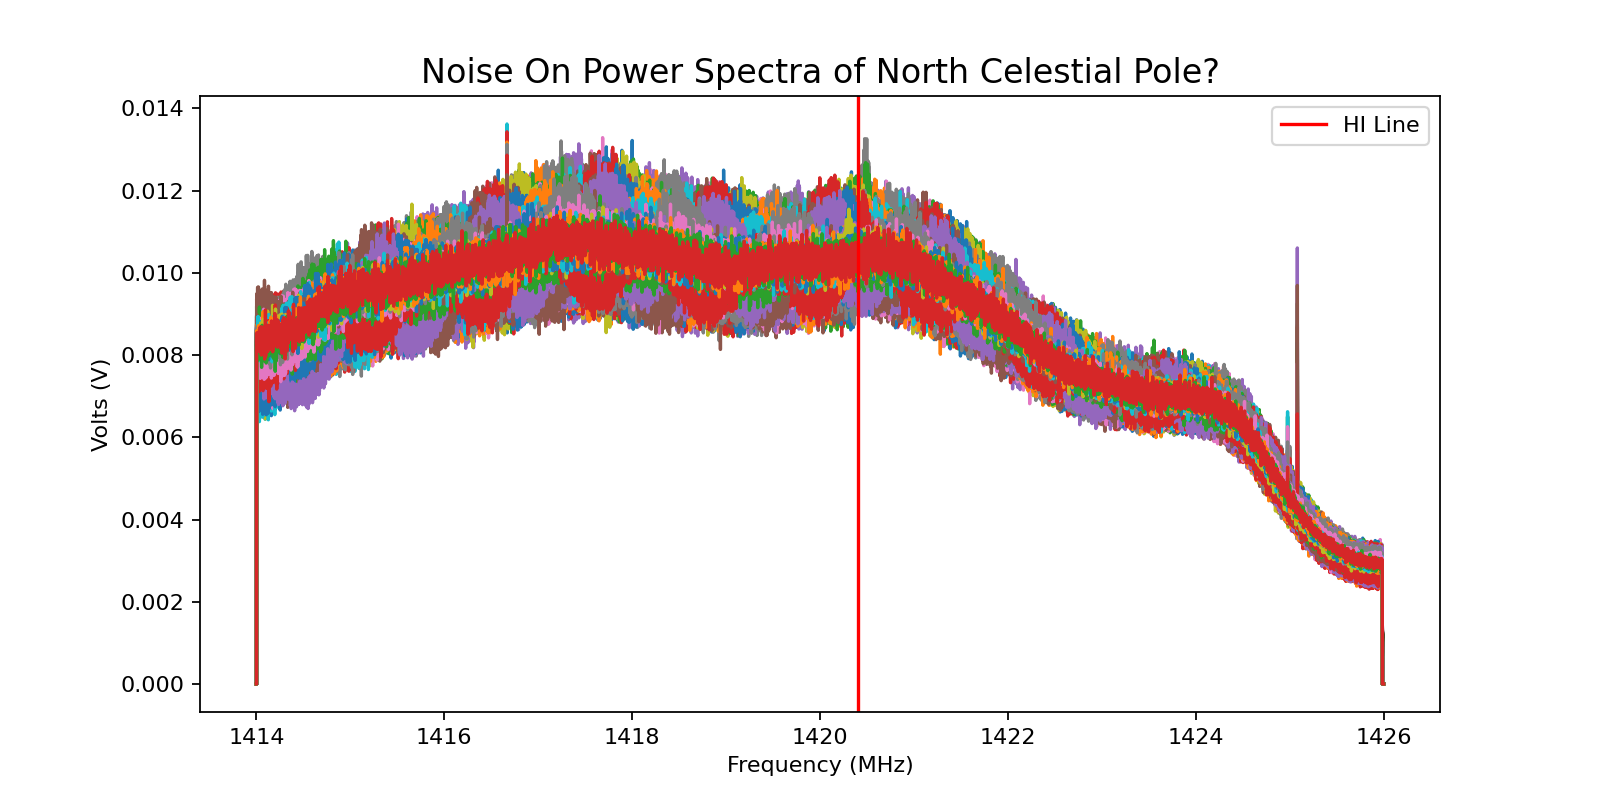

In [12]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in data_noise_on:
    
    plt.plot(rf_freq, data_noise_on[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise On Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

# Calibration 

In [13]:
import tqdm 

<IPython.core.display.Javascript object>


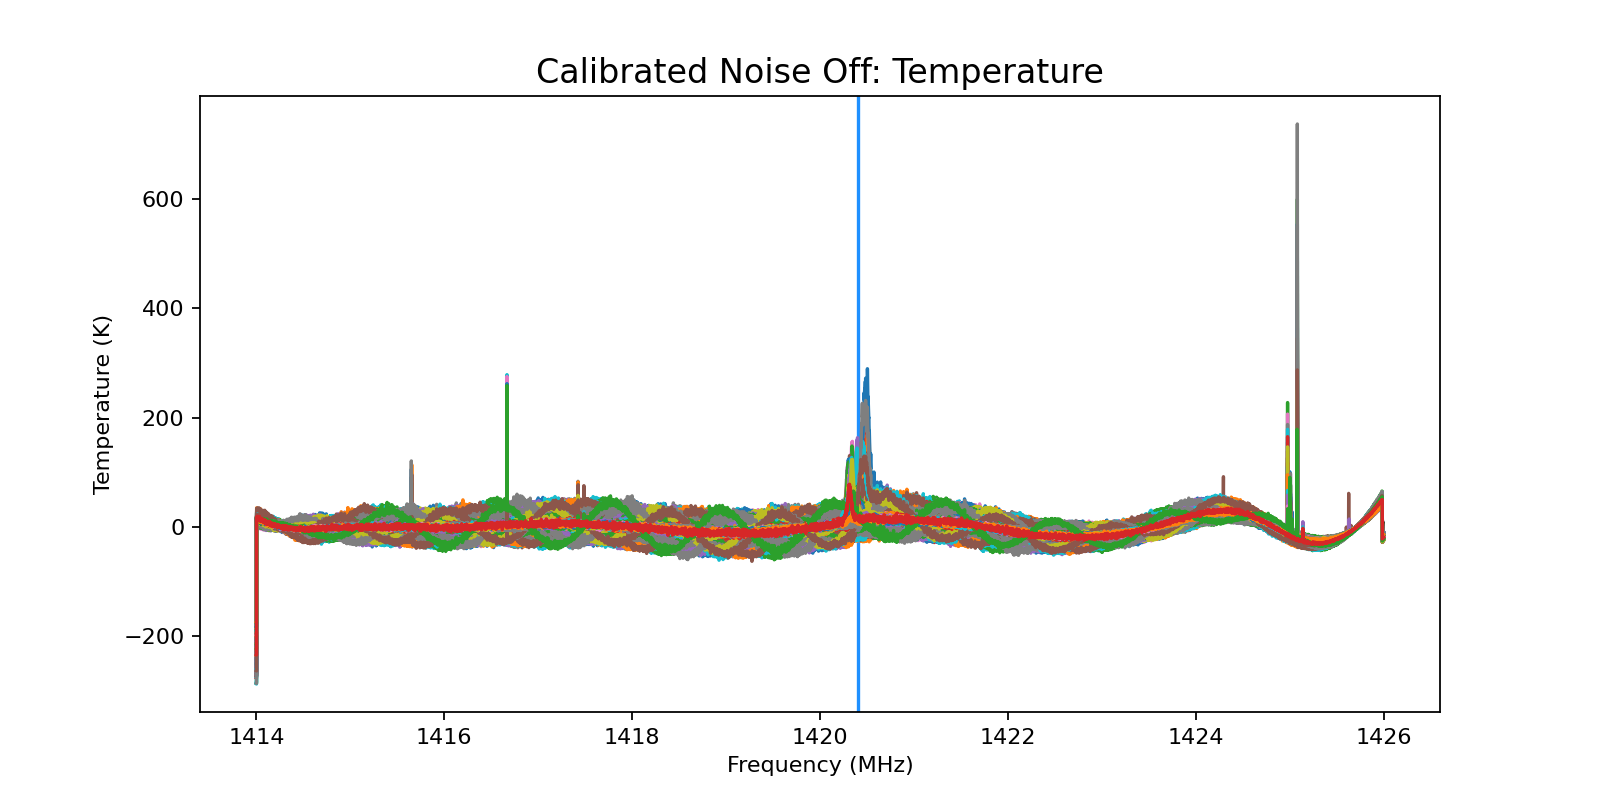

100%|██████████| 474/474 [00:03<00:00, 124.37it/s]


In [18]:
%matplotlib notebook

calibrated_noise_off_spectra = []
t_noise = 90
t_sys = 2.5

plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in tqdm.tqdm(data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off
    
    calibrated_noise_off_spectra.append(g*(s_line - fit))

<IPython.core.display.Javascript object>


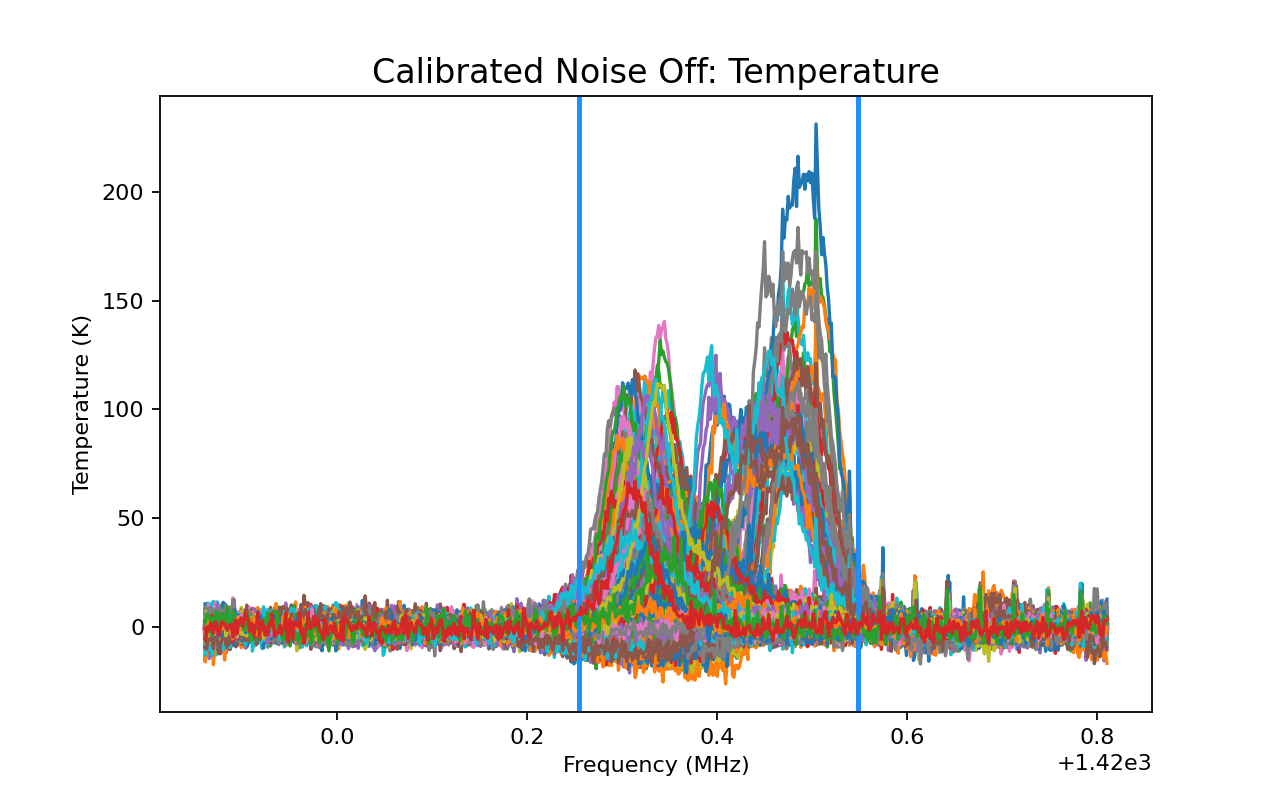

  0%|          | 0/474 [00:00<?, ?it/s]/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
  1%|          | 3/474 [00:00<00:15, 29.54it/s]/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/melrusso/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorl

In [102]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)
calibrated_noise_off_dictionary = {}
calibrated_noise_off_list = []

for i in tqdm.tqdm(data_noise_off):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    #line = np.concatenate(s_line[4000:4270],s_line[4470:5000])
    
    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]
    filt_freq = rf_freq[index]
    filt_power = s_line[index]
    ind_left = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4270]))[0] 
    ind_right = np.where((rf_freq > rf_freq[4470]) & (rf_freq < rf_freq[4650]))[0]
    inds = np.hstack([ind_left, ind_right])
    
    p = np.polyfit(rf_freq[inds], s_line[inds], 7)
    
    fit = np.polyval(p, rf_freq[index])
    
    plt.axvline(rf_freq[4270], color='dodgerblue')
    plt.axvline(rf_freq[4470], color='dodgerblue')
    
    plt.plot(rf_freq[index], g*(s_line[index] - fit), label='ON') #off
    
    calibrated_noise_off_dictionary[i] = g*(s_line[index] - fit)
    calibrated_noise_off_list.append(g*(s_line[index] - fit))

In [26]:
# looks good!!

In [19]:
#there is still ripple gain

#get rid by fitting region where the spike is not

#spike will be at different - look at a few spectra and see where spike moves to, how much it changes
#how fast do we expect the area around the north celecstial pole to 
#use that to find out how redshfited/ doppler shifted the object is 

#exclude frequencies -- use cursor to find right and left bounds on frequency on 5 or 10 random files -- break them up
#polyfit exluding peak but include region set around peak
#to make sure our peak is closer to zero

# Next Steps

In [19]:
galactic_1d_grid = []
galactic_latitude_array = np.arange(15, 41, 2)
galactic_longitude_array = np.arange(105, 160, 2)

for lat in galactic_latitude_array:
    for long in galactic_longitude_array:
        galactic_1d_grid.append((lat, long))
        
# get l,b for each spectra
# select 21cm line, and stick power into each grid 
# missing velocity - 
# low freq, mid freq, and high freq grids 

In [20]:
# 2d_array same size as galactic grid
# pick channel that span, sum it all up, get one number

# calibrated_noise_off_spectra
# axis 1 : long, axis 2: lat, axis 3: vel 

In [29]:
len(spectra)

649

In [42]:
for i in calibrated_noise_off_dictionary:
    #spectra already in temperature from calibrated
    #power = np.sum(spectra) #not meaningful, be careful, keep things in temp units. Take an average
    #power = np.mean(spectra[4270 : 4470])# fix this later # do different slices 
    
    spectra = calibrated_noise_off_dictionary[i]
    #print(spectra)
    power = np.mean(spectra)
    #power_dict[i] = power
    print(power)
    print('asd') oh it is one value
    #its a loop, but ya np.mean should turn it into one value

1.6712002030031587
asd
1.3305865739559548
asd
1.066848546858363
asd
2.3915011180079513
asd
2.374544385855946
asd
3.1427814851872764
asd
9.621156101177904
asd
1.8844812122251489
asd
0.7650064125742783
asd
9.722958848691157
asd
4.04050860228454
asd
1.3528838311345959
asd
2.4786332229642616
asd
2.4598577249777938
asd
0.45856183337591255
asd
1.2422372987051762
asd
6.061273334723105
asd
0.7304224654545116
asd
7.933028518409944
asd
0.3034139050237856
asd
0.823800903020499
asd
0.7581431421198928
asd
2.2013028234285716
asd
2.8333327490384086
asd
7.244892708559474
asd
1.9477256036935797
asd
1.080845162486301
asd
5.420424094993305
asd
2.2857988360817147
asd
0.5071321656474689
asd
1.6994010783583884
asd
1.2461236093062311
asd
-0.9839402635660375
asd
7.399231634588009
asd
1.5670766915277472
asd
0.47625748761572895
asd
-0.1593931452045039
asd
1.1185874767720005
asd
10.305662921630109
asd
0.35732047865220196
asd
1.8314297554368986
asd
0.24907426998406065
asd
8.99549557132331
asd
2.4087121811253955
a

In [58]:
# sum up hi line power for each pointing
# finds out how much hydrogen per pointing
# select blue shifted hydrogen
# select red shifted hydrogen 

f_0 = 1420.4e6 #Hz
c = 3e8 #m/s
k = 1.381e-23 #1.381e-16 cgs
nu_0 = 1420.405 #Mhz #hydrogen rest freq
nu = []
c = 3e8 #m/s

power_dict = {}
intensity_dict = {}
column_density_dict = {}
doppler_velocity_dict = {}

for i in calibrated_noise_off_dictionary:
    #spectra already in temperature from calibrated
    #power = np.sum(spectra) #not meaningful, be careful, keep things in temp units. Take an average
    #power = np.mean(spectra[4270 : 4470])# fix this later # do different slices 
    
    spectra = calibrated_noise_off_dictionary[i]
    power = np.mean(spectra)
    power_dict[i] = power

    #spectra_index = list(spectra).index(max(spectra))
    freq = rf_freq[index]*1e6 #[spectra_index]*1e6 #so it's in hertz
    #brightness_temp = spectra[spectra_index]
    intensity = spectra*2*k*freq**2/(c**2)
    
    #intensity = 2*freq**2*(1.381e-23)*brightness_temp/(c**2)# c is in seconds
    intensity_dict[i] = intensity
    
    v = freq*c/(2*f_0) *1e2 # doppler velocity, convert to cm/s
    delta_v = np.median(v[1:]-v[:-1]) #np.diff(v)
    column_density = spectra* delta_v * 1.8e18
    
    column_density_dict[i] = np.sum(column_density)
    
    spectra_index = list(spectra).index(max(spectra))
    new_freq = freq[spectra_index]
    delta_nu = new_freq - nu_0
    vel = delta_nu * c / nu_0
    doppler_velocity_dict[i] = vel

In [66]:
doppler_velocity_dict 

{(33, 139): 299981297733128.94,
 (35, 117): 299985010362625.44,
 (45, 123): 299983154047877.25,
 (25, 105): 300006048596439.06,
 (47, 149): 299983463433668.6,
 (23, 115): 299984391591042.7,
 (17, 147): 299986866677373.7,
 (31, 113): 299990269921078.8,
 (41, 141): 299994910707949.5,
 (15, 119): 300015020784388.94,
 (21, 139): 299983463433668.6,
 (35, 125): 299988104220539.25,
 (45, 135): 299982225890503.06,
 (25, 137): 299983772819459.94,
 (39, 115): 299997076408489.1,
 (29, 121): 299985010362625.44,
 (19, 123): 299983463433668.6,
 (37, 121): 299989341763704.75,
 (17, 113): 299984700976834.06,
 (33, 107): 299996457636906.4,
 (27, 159): 300002335966942.5,
 (45, 119): 299986557291582.4,
 (35, 145): 299980369575754.8,
 (31, 147): 299977585103632.44,
 (15, 153): 300013164469640.75,
 (27, 135): 299983463433668.6,
 (39, 147): 299981916504711.7,
 (19, 139): 299986557291582.4,
 (29, 137): 299983463433668.6,
 (43, 151): 300001717195359.8,
 (33, 131): 299984700976834.06,
 (37, 129): 2999828446620

# DICTIONARIES

data_noise_off

data_noise_on

calibrated_noise_off_dictionary

power_dict

intensity_dict

column_density_dict

doppler_velocity_dict

In [60]:
# create grids

power_grid = np.zeros((len(Ls),len(Bs)))
intensity_grid = np.zeros((len(Ls),len(Bs)))
column_density_grid = np.zeros((len(Ls),len(Bs)))
doppler_velocity_grid = np.zeros((len(Ls),len(Bs)))

for (L,B), spec in power_dict.items(): #items gives you the keys and the values
    power_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec

for (L,B), spec in intensity_dict.items(): #items gives you the keys and the values
    intensity_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
    
for (L,B), spec in column_density_dict.items(): #items gives you the keys and the values
    column_density_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists
    
for (L,B), spec in doppler_velocity_dict.items(): #items gives you the keys and the values
    doppler_velocity_grid[np.argwhere(Ls == L)[0][0], np.argwhere(Bs==B)[0][0]] = spec.max() #gives you a list of lists

In [91]:
for i in doppler_velocity_grid:
    first_index = 0
    for j in i:
        second_index = 0
        if j < 1:
            doppler_velocity_grid[first_index][second_index] = something 
            # what do i set the 0s equal to? or do i remove them?
            

300020589728633.75
300020589728633.75
300020589728633.75
300016567713345.9
300016567713345.9
300016567713345.9
300016258327554.5
300015020784388.94
300013164469640.75
300000170266402.9
299998313951654.7
299997385794280.5
299985319748416.8
299983772819459.94
299981297733128.94
299980369575754.8
299979750804172.06
299977894489423.8
299976347560466.94
299975728788884.2
300020589728633.75
300017186484928.6
300013164469640.75
300013164469640.75
300013164469640.75
300013164469640.75
300017186484928.6
300005739210647.7
300013164469640.75
300000170266402.9
299998313951654.7
299985319748416.8
299984700976834.06
299982535276294.44
299980988347337.56
299979441418380.7
299977894489423.8
299976347560466.94
299975419403092.75
300020589728633.75
300014402012806.2
300013164469640.75
300013164469640.75
300013164469640.75
300013164469640.75
300009142454352.8
300006976753813.2
300005120439064.94
299986557291582.4
299986866677373.7
299985010362625.44
299982844662085.8
299981607118920.3
299979441418380.7
2

<IPython.core.display.Javascript object>


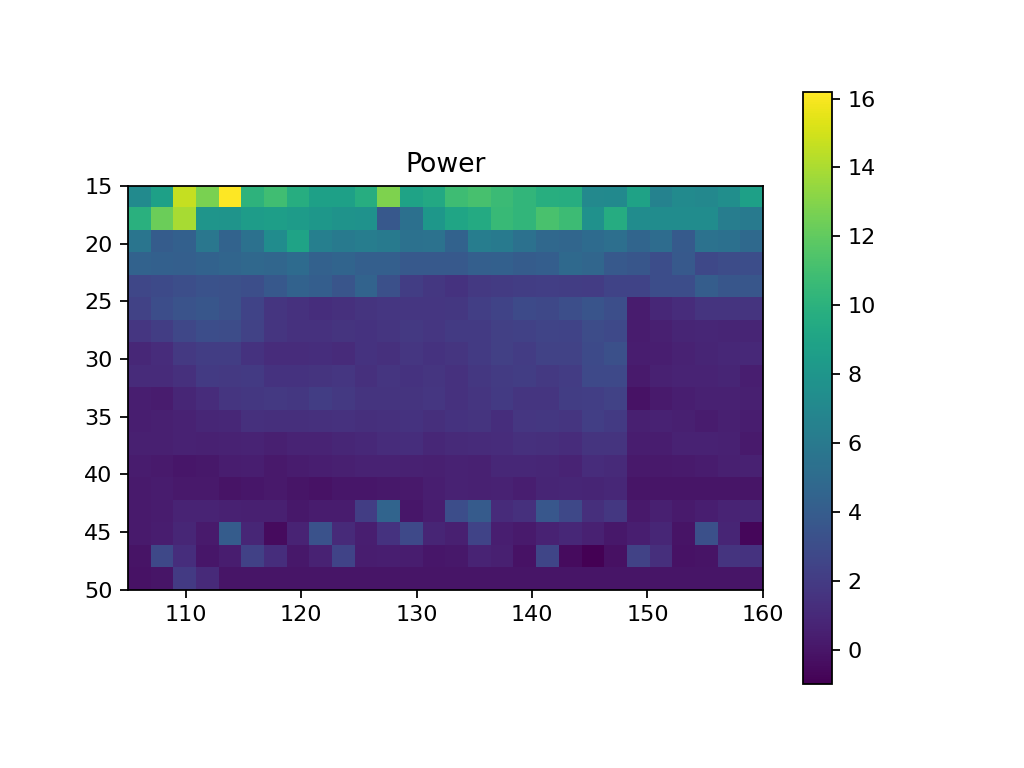

Text(0.5, 1.0, 'Power')

In [61]:
plt.figure()
plt.imshow(power_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Power')

<IPython.core.display.Javascript object>


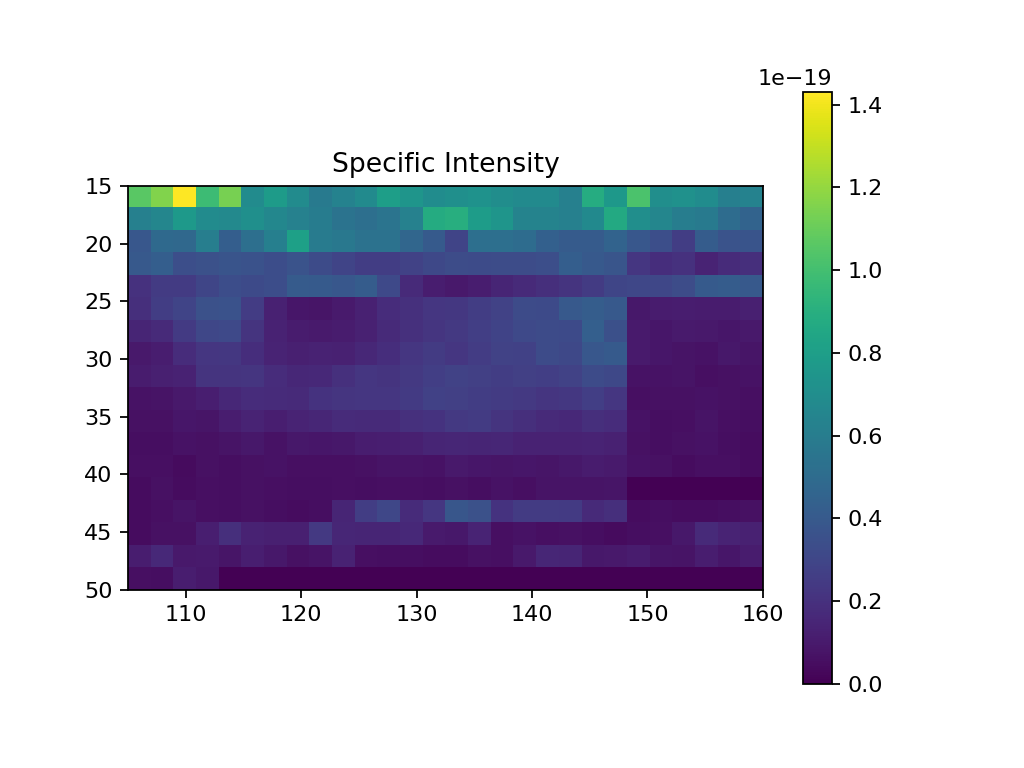

Text(0.5, 1.0, 'Specific Intensity')

In [62]:
plt.figure()
plt.imshow(intensity_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Specific Intensity')

<IPython.core.display.Javascript object>


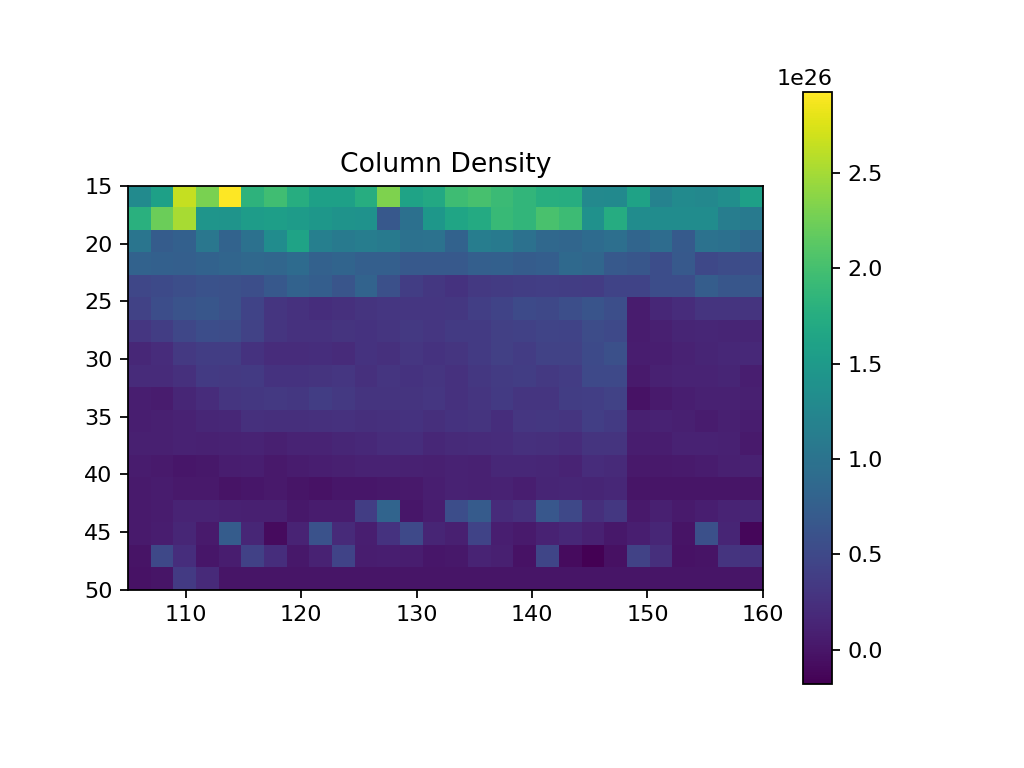

Text(0.5, 1.0, 'Column Density')

In [63]:
plt.figure()
plt.imshow(column_density_grid, extent=[105,160,50,15])
plt.colorbar()
plt.title('Column Density')

<IPython.core.display.Javascript object>


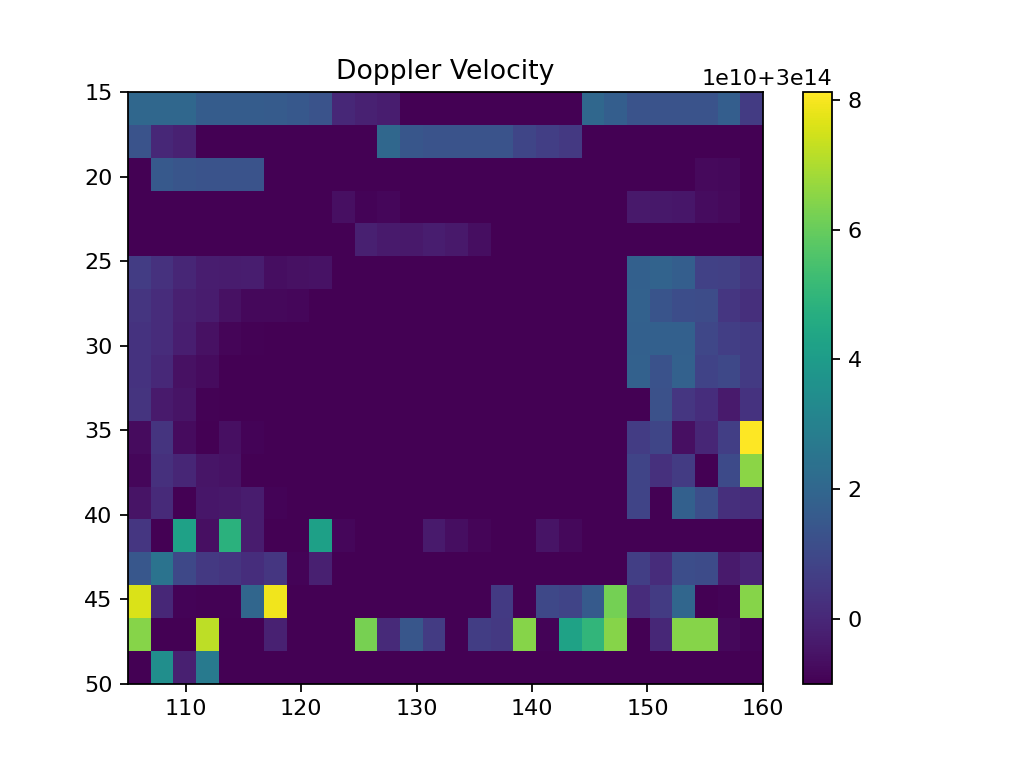

Text(0.5, 1.0, 'Doppler Velocity')

In [89]:
plt.figure()
plt.imshow(doppler_velocity_grid, vmin=2.99990e14, aspect='auto', extent=[105,160,50,15])
plt.colorbar()
plt.title('Doppler Velocity')
#wait

# Calculate Errors

<IPython.core.display.Javascript object>


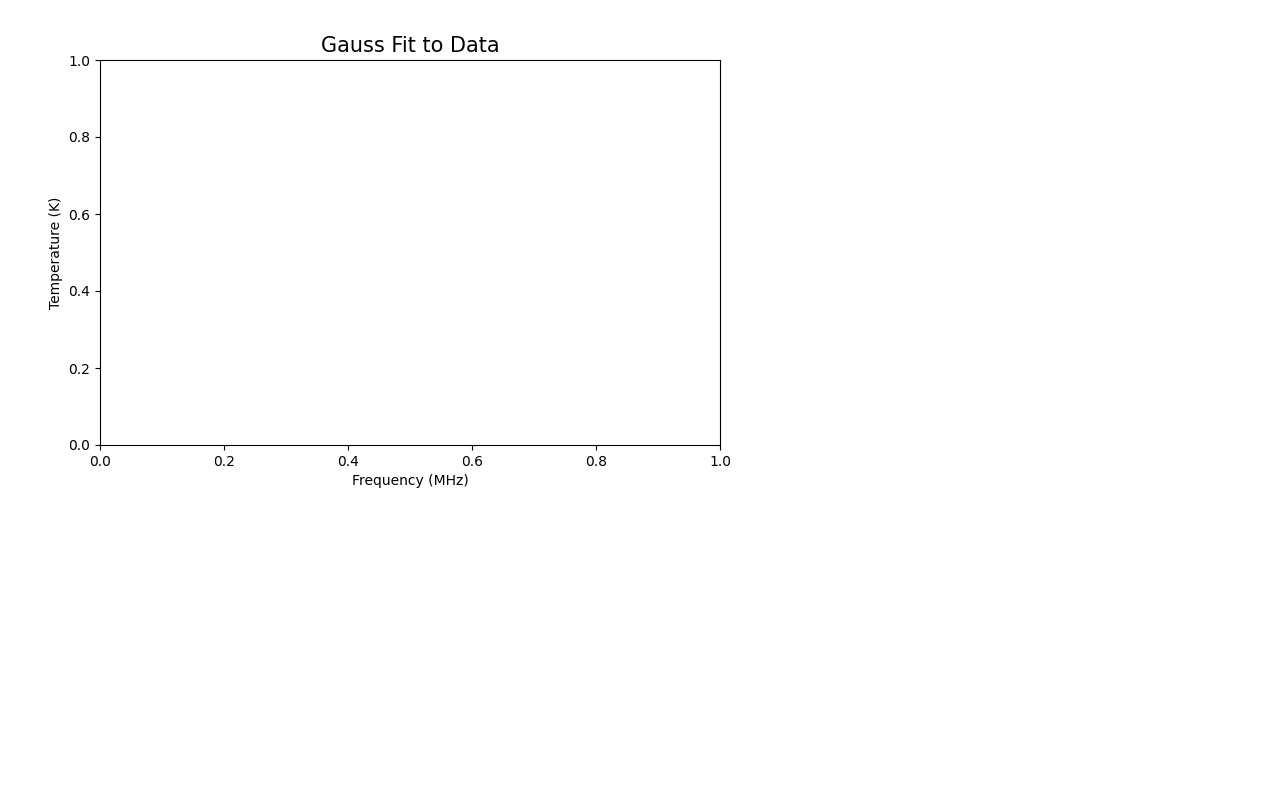

ValueError: operands could not be broadcast together with shapes (649,) (196,) 

In [119]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Gauss Fit to Data', fontsize=15)

gauss_fit = []
freq_cal = rf_freq[4000:4650]
for full_spectra in calibrated_noise_off_list:

    index = np.where((rf_freq > rf_freq[4000]) & (rf_freq < rf_freq[4650]))[0]

    spectra = full_spectra[274:470]
    
    amp2 = np.max(spectra)
    avg2 = freq_cal[list(spectra).index(np.max(spectra))]
    sig2 = rf_freq[4470]-rf_freq[4270]
    d = {'amp' : amp2, 'avg':avg2, 'sig': sig2}
    
    # we need to make sure that these are teh same length- spectra and rf_freq[index]
    
    gauss_fit = np.polyfit(rf_freq[index][274:470], spectra, 2) 
    gauss_val = np.polyval(gauss_fit, rf_freq[index][274:470])
    
    gauss_fit = ugradio.gauss.gaussfit(rf_freq[index], spectra, **d) 
    gauss_val = ugradio.gauss.gaussval(rf_freq[index], **gauss_fit)
    
    #plt.axvline(rf_freq[4270], color='dodgerblue')
    #plt.axvline(rf_freq[4470], color='dodgerblue')
    
    #plt.plot(rf_freq[index][274:470], spectra, label='Data')
    plt.plot(rf_freq[index], full_spectra, label='Data')
    plt.plot(rf_freq[index][274:470], gauss_val, 'r', label='Fit')

In [ ]:
wait also

can you explain our goal here

like, we have 386 specrta to fit to

do we want 386 error calcs?

ohh, so each spectra gets a fit and an error, which we use for the intensity, column density, etc errors? 
and then we average those

so we're gonna have a huge list of errors, ya okay

so then, i can look at maybe our old code to see how we fit, 

Object `np.curve_fit` not found.
